# Data Cleaning Notebook

## 1. Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

## 2. Load Dataset

In [14]:
df = pd.read_csv("../data/raw_retail_store_sales.csv")
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


## 3. Initial Exploration

In [15]:
print("Initial Shape:", df.shape)
df.info()
df.describe(include="all")

Initial Shape: (12575, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
count,12575,12575,12575,11362,11966.000000,11971.000000,11971.000000,12575,12575,12575,8376
unique,12575,25,8,200,NaN,NaN,NaN,3,2,1114,2
top,TXN_6867343,CUST_05,Electric household essentials,Item_2_BEV,NaN,NaN,NaN,Cash,Online,2022-05-30,True
freq,1,544,1591,126,NaN,NaN,NaN,4310,6354,26,4219
mean,NaN,NaN,NaN,NaN,23.365912,5.536380,129.652577,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,10.743519,2.857883,94.750697,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,1.000000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,14.000000,3.000000,51.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,23.000000,6.000000,108.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,33.500000,8.000000,192.000000,NaN,NaN,NaN,NaN


## 4. Handle Missing Values

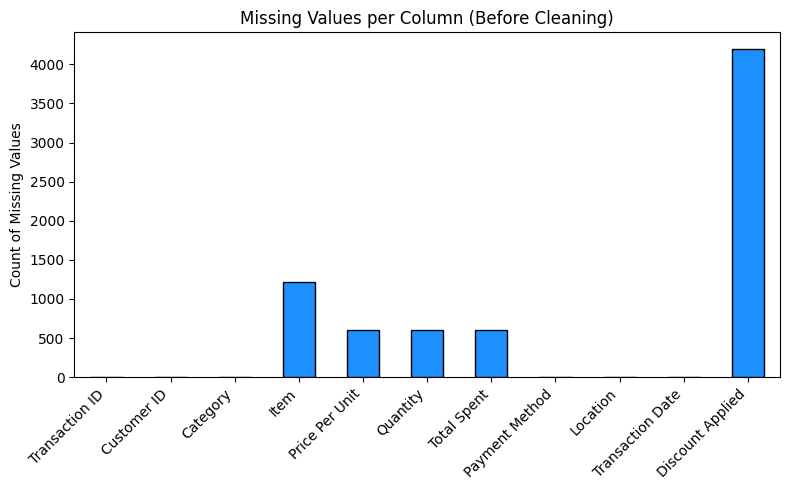

In [ ]:
# Track before cleanup
df_before = df.copy()

# Track after cleanup
df_after = df.copy()

# Fill missing Item with 'Unknown'
df_after["Item"] = df_after["Item"].fillna("Unknown")

# Deduce missing totals
mask_missing_total = df_after["Total Spent"].isnull() & df_after["Price Per Unit"].notnull() & df_after["Quantity"].notnull()
df_after.loc[mask_missing_total, "Total Spent"] = df_after["Price Per Unit"] * df_after["Quantity"]

mask_missing_price = df_after["Price Per Unit"].isnull() & df_after["Total Spent"].notnull() & df_after["Quantity"].notnull()
df_after.loc[mask_missing_price, "Price Per Unit"] = df_after["Total Spent"] / df_after["Quantity"]

mask_missing_qty = df_after["Quantity"].isnull() & df_after["Total Spent"].notnull() & df_after["Price Per Unit"].notnull()
df_after.loc[mask_missing_qty, "Quantity"] = df_after["Total Spent"] / df_after["Price Per Unit"]

# Still missing → fill with median
df_after["Price Per Unit"] = df_after["Price Per Unit"].fillna(df_after["Price Per Unit"].median())
df_after["Quantity"] = df_after["Quantity"].fillna(df_after["Quantity"].median())
df_after["Total Spent"] = df_after["Total Spent"].fillna(df_after["Total Spent"].median())

# Discount Applied
df_after["Discount Applied"] = df_after["Discount Applied"].fillna("Unknown")


# --- PLOT 1: Missing values bar chart (before cleaning) ---
missing_counts = df_before.isnull().sum()

plt.figure(figsize=(8,5))
missing_counts.plot(kind="bar", color="dodgerblue", edgecolor="black")
plt.title("Missing Values per Column (Before Cleaning)")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




## 5. Remove Duplicates

In [20]:
print("Duplicates before:", df.duplicated().sum())

# Transaction ID should be unique
df = df.drop_duplicates(subset=["Transaction ID"])

print("Duplicates after:", df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


## 6. Standardize Formats

In [22]:
# Convert Transaction Date to datetime
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

# Standardize Payment Method
df["Payment Method"] = df["Payment Method"].str.strip().str.title()

# Standardize Location
df["Location"] = df["Location"].str.strip().str.title()

# Standardize Discount Applied → convert to boolean (True/False/Unknown)
df["Discount Applied"] = df["Discount Applied"].replace(
    {"TRUE": True, "True": True, "FALSE": False, "False": False})

## 7. Outlier Detection & Treatment

Potential mismatched totals: 604
Price Per Unit outliers detected: 0
Quantity outliers detected: 0
Total Spent outliers detected: 60


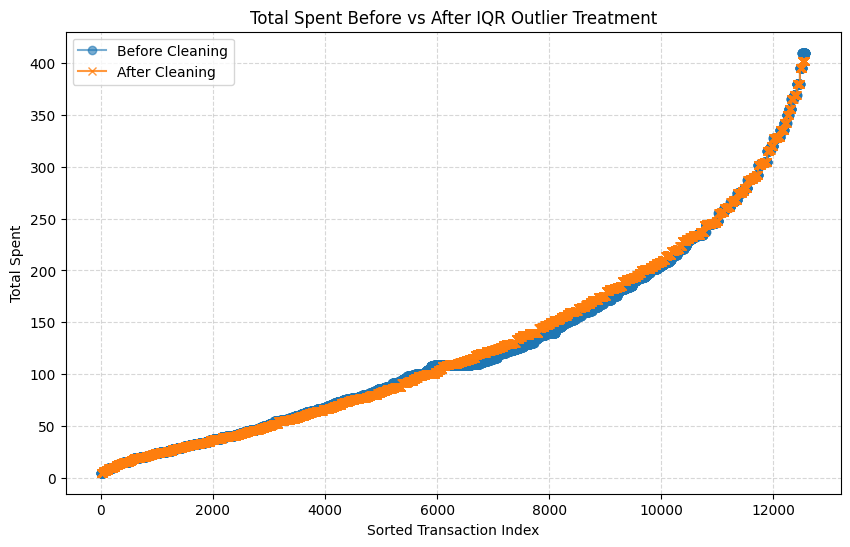

In [ ]:
before_total = df["Total Spent"].copy()


df["Calc_Total"] = df["Price Per Unit"] * df["Quantity"]
outliers = df[np.abs(df["Total Spent"] - df["Calc_Total"]) > 1e-6]
print("Potential mismatched totals:", outliers.shape[0])
df.loc[outliers.index, "Total Spent"] = df.loc[outliers.index, "Calc_Total"]
df = df.drop(columns=["Calc_Total"])

for col in ["Price Per Unit", "Quantity", "Total Spent"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} outliers detected:", outliers.shape[0])
    df[col] = np.where(df[col] < lower, lower,
                np.where(df[col] > upper, upper, df[col]))


after_total = df["Total Spent"].copy()

plt.figure(figsize=(10,6))

plt.plot(np.sort(before_total.dropna()), label="Before Cleaning", marker="o", alpha=0.6)
plt.plot(np.sort(after_total.dropna()), label="After Cleaning", marker="x", alpha=0.8)

plt.title("Total Spent Before vs After IQR Outlier Treatment")
plt.xlabel("Sorted Transaction Index")
plt.ylabel("Total Spent")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



## Final Check

In [8]:
print("Final Shape:", df.shape)
display(df.head())
df.info()
df.describe(include="all")

Final Shape: (12575, 11)


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,Unknown
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  float64       
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
count,12575,12575,12575,12575,12575.000000,12575.000000,12575.000000,12575,12575,12575,12575
unique,12575,25,8,201,NaN,NaN,NaN,3,2,NaN,3
top,TXN_6867343,CUST_05,Electric household essentials,Unknown,NaN,NaN,NaN,Cash,Online,NaN,True
freq,1,544,1591,1213,NaN,NaN,NaN,4310,6354,NaN,4219
mean,NaN,NaN,NaN,NaN,23.369304,5.558648,130.169940,NaN,NaN,2023-07-12 20:23:41.105368064,NaN
min,NaN,NaN,NaN,NaN,5.000000,1.000000,5.000000,NaN,NaN,2022-01-01 00:00:00,NaN
25%,NaN,NaN,NaN,NaN,14.000000,3.000000,52.000000,NaN,NaN,2022-09-30 00:00:00,NaN
50%,NaN,NaN,NaN,NaN,23.000000,6.000000,110.000000,NaN,NaN,2023-07-13 00:00:00,NaN
75%,NaN,NaN,NaN,NaN,33.500000,8.000000,192.000000,NaN,NaN,2024-04-24 00:00:00,NaN
max,NaN,NaN,NaN,NaN,41.000000,10.000000,402.000000,NaN,NaN,2025-01-18 00:00:00,NaN


## 8. Save Cleaned Dataset

In [9]:
df.to_csv("../data/cleaned_dataset.csv", index=False)
print("Cleaned dataset saved at data/cleaned_dataset.csv")

Cleaned dataset saved at data/cleaned_dataset.csv
